Baixando as bibliotecas necessárias e importando o CSV limpo

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
dataQ = pd.read_csv("./csv_limpo", sep=",")
dataQ.columns = dataQ.columns.str.strip()
dataQ = dataQ.drop(columns=["Unnamed: 0"])
dataQ

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general contingent,6,Journalism and Communication,daytime,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1st phase - general contingent,2,Journalism and Communication,daytime,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1st phase - general contingent,1,Nursing,daytime,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general contingent,1,Management,daytime,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Análise dos atributos qualitativos

Primeiro, vamos fazer a análise da distribuição geral da varíavel alvo, que indica se o aluno graduou-se, evadiu o curso ou se ainda está matriculado.

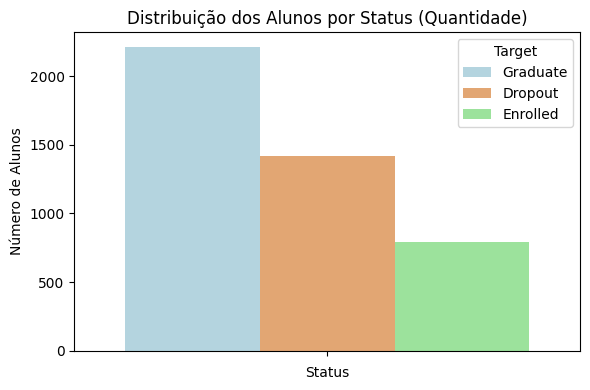

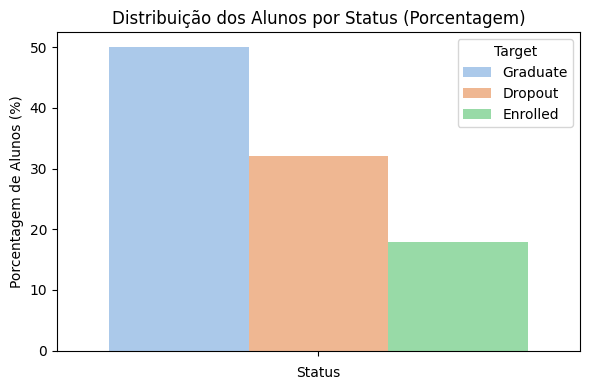

Quantidade dos valores:



Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Porcentagem dos valores:



Target
Graduate    49.93
Dropout     32.12
Enrolled    17.95
Name: proportion, dtype: float64

In [5]:
pastel = {'Graduate': 'lightblue', 'Dropout': 'sandybrown', 'Enrolled': 'lightgreen'}

target_counts_qtd = dataQ["Target"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(hue=target_counts_qtd.index, y=target_counts_qtd.values, palette=pastel)
plt.title("Distribuição dos Alunos por Status (Quantidade)")
plt.ylabel("Número de Alunos")
plt.xlabel("Status")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

target_counts_porcentagem = dataQ["Target"].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(hue=target_counts_porcentagem.index, y=target_counts_porcentagem.values, palette="pastel")

plt.title("Distribuição dos Alunos por Status (Porcentagem)")
plt.ylabel("Porcentagem de Alunos (%)")
plt.xlabel("Status")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Quantidade dos valores:\n")
display(target_counts_qtd)

print("Porcentagem dos valores:\n")
display(target_counts_porcentagem.round(2))

Agora, vamos analisar a relação das outras variáveis qualitativas com a variável alvo.

### Estado civil

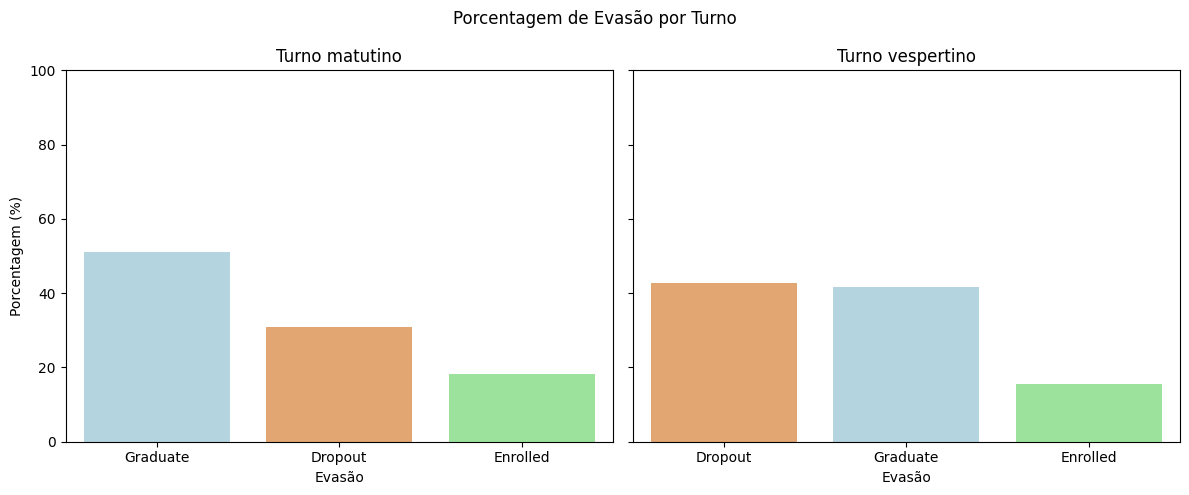

Turno matutino Graduados: 50.95%
Turno matutino Que evadiram: 30.80%
Turno matutino Matriculados: 18.24%

Turno vespertino Graduados: 41.61%
Turno vespertino Que evadiram: 42.86%
Turno vespertino Matriculados: 15.53%



In [6]:
grupos = {
    'Turno matutino': dataQ[dataQ['Daytime/evening attendance'] == 'daytime'],
    'Turno vespertino': dataQ[dataQ['Daytime/evening attendance'] == 'evening']
}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

pastel = {'Graduate': 'lightblue', 'Dropout': 'sandybrown', 'Enrolled': 'lightgreen'}

for ax, (titulo, grupo) in zip(axes, grupos.items()):
    proporcao = (grupo['Target'].value_counts(normalize=True) * 100).reset_index()
    proporcao.columns = ['Target', 'Porcentagem']
    
    sns.barplot(data=proporcao, x='Target', y='Porcentagem', hue='Target', ax=ax, palette=pastel)
    ax.set_title(titulo)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Evasão')
    ax.set_ylabel('Porcentagem (%)')


plt.suptitle('Porcentagem de Evasão por Turno')
plt.tight_layout()
plt.show()

for titulo, grupo in grupos.items():
    total = len(grupo)
    graduados = (grupo['Target'] == 'Graduate').sum()
    evadiram = (grupo['Target'] == 'Dropout').sum()
    matriculados = (grupo['Target'] == 'Enrolled').sum()
    
    graduados_pct = (graduados / total) * 100 if total > 0 else 0
    evadiram_pct = (evadiram / total) * 100 if total > 0 else 0
    matriculados_pct = (matriculados / total) * 100 if total > 0 else 0
    
    print(f"{titulo} Graduados: {graduados_pct:.2f}%")
    print(f"{titulo} Que evadiram: {evadiram_pct:.2f}%")
    print(f"{titulo} Matriculados: {matriculados_pct:.2f}%\n")


### Evasões por curso

Visualizando um gráfico de pizza, para mostrar visualmente a proporção de Evasões por Curso, vemos que Gestão no periodo da noite, enfermagem, jornalismo e comunicação são os cursos com mais evasão

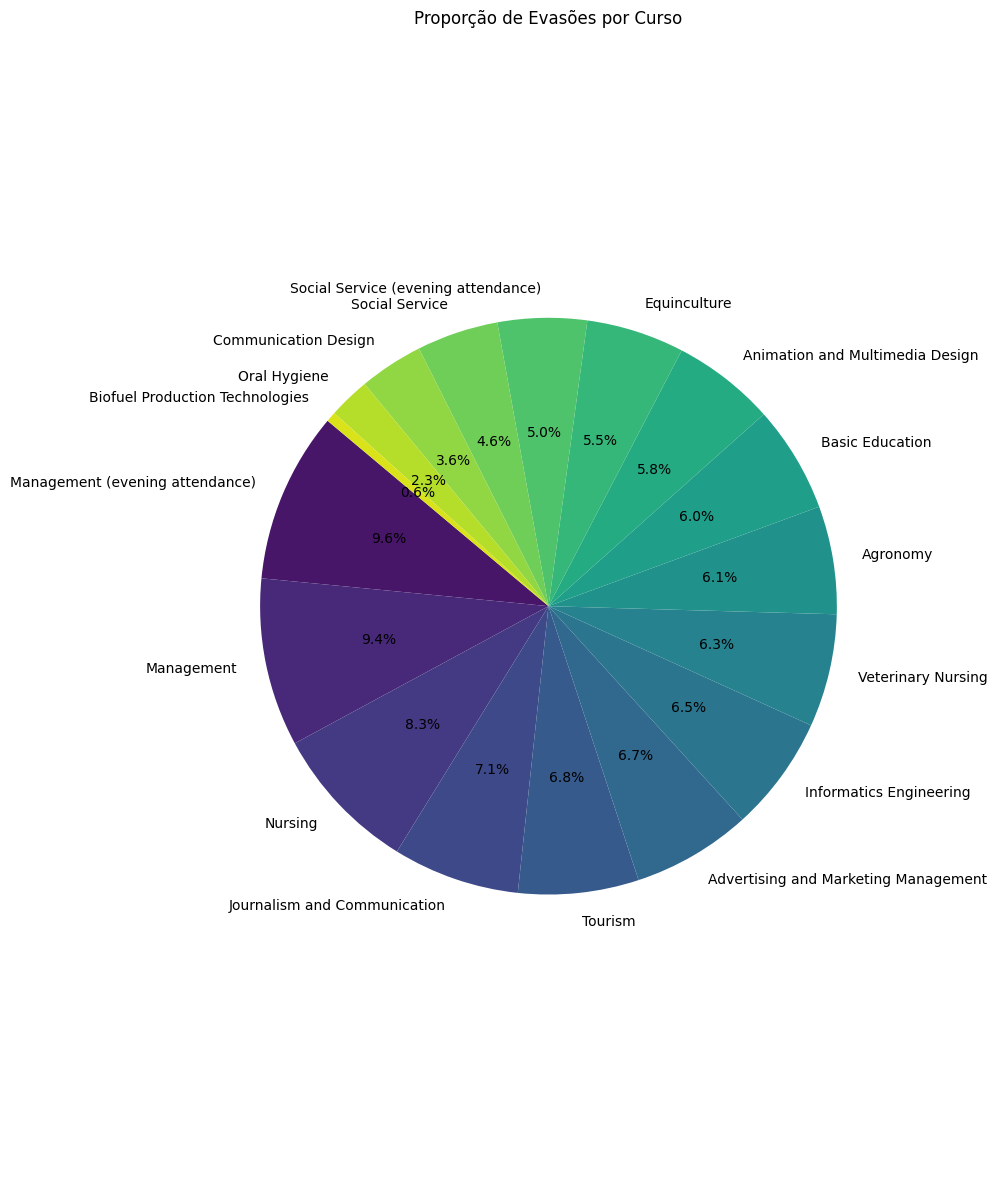

In [7]:
evasao_por_curso = dataQ[dataQ['Target'] == 'Dropout']['Course'].value_counts()
plt.figure(figsize=(10, 12))
plt.pie(evasao_por_curso.values, labels=evasao_por_curso.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(evasao_por_curso)))
plt.title("Proporção de Evasões por Curso")
plt.axis('equal')
plt.tight_layout()
plt.show()

### Turno de aula

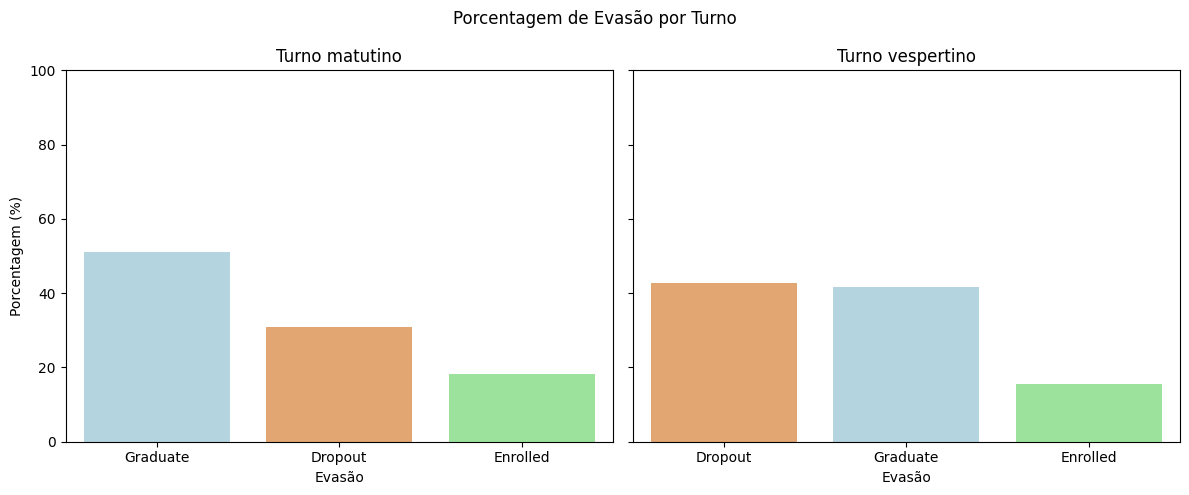

Turno matutino Graduados: 50.95%
Turno matutino Que evadiram: 30.80%
Turno matutino Matriculados: 18.24%

Turno vespertino Graduados: 41.61%
Turno vespertino Que evadiram: 42.86%
Turno vespertino Matriculados: 15.53%



In [8]:
grupos = {
    'Turno matutino': dataQ[dataQ['Daytime/evening attendance'] == 'daytime'],
    'Turno vespertino': dataQ[dataQ['Daytime/evening attendance'] == 'evening']
}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

palette = {'Graduate': 'lightblue', 'Dropout': 'sandybrown', 'Enrolled': 'lightgreen'}

for ax, (titulo, grupo) in zip(axes, grupos.items()):
    proporcao = (grupo['Target'].value_counts(normalize=True) * 100).reset_index()
    proporcao.columns = ['Target', 'Porcentagem']
    
    sns.barplot(data=proporcao, x='Target', y='Porcentagem', hue='Target', ax=ax, palette=palette)
    ax.set_title(titulo)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Evasão')
    ax.set_ylabel('Porcentagem (%)')

plt.suptitle('Porcentagem de Evasão por Turno')
plt.tight_layout()
plt.show()

for titulo, grupo in grupos.items():
    total = len(grupo)
    graduados = (grupo['Target'] == 'Graduate').sum()
    evadiram = (grupo['Target'] == 'Dropout').sum()
    matriculados = (grupo['Target'] == 'Enrolled').sum()
    
    graduados_pct = (graduados / total) * 100 if total > 0 else 0
    evadiram_pct = (evadiram / total) * 100 if total > 0 else 0
    matriculados_pct = (matriculados / total) * 100 if total > 0 else 0
    
    print(f"{titulo} Graduados: {graduados_pct:.2f}%")
    print(f"{titulo} Que evadiram: {evadiram_pct:.2f}%")
    print(f"{titulo} Matriculados: {matriculados_pct:.2f}%\n")



### Gênero

Analisando graficamente vemos que a taxa de evasão do sexo masculino é maior que o feminino

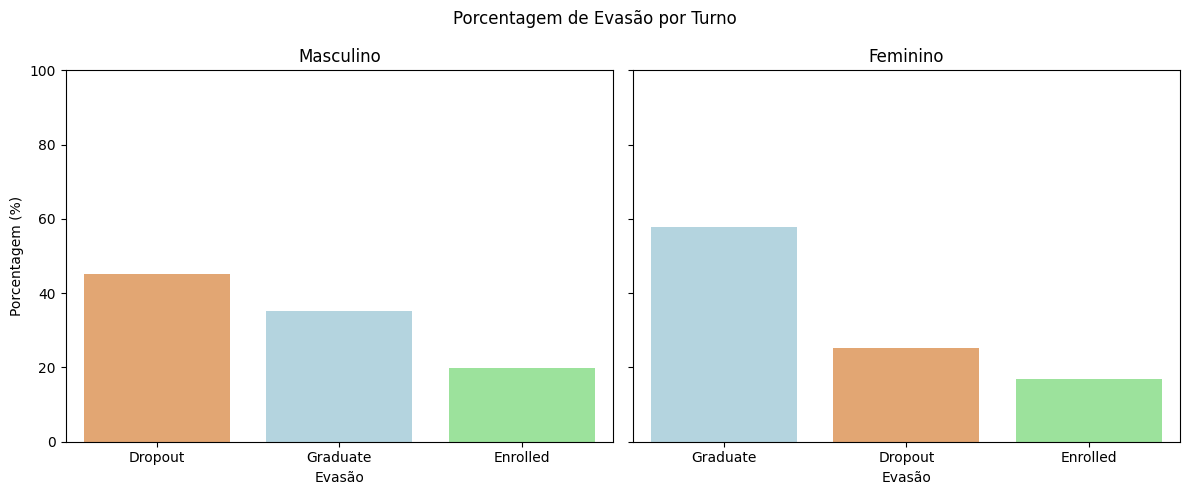

Masculino Graduados: 35.22%
Masculino Que evadiram: 45.05%
Masculino Matriculados: 19.73%

Feminino Graduados: 57.91%
Feminino Que evadiram: 25.10%
Feminino Matriculados: 16.98%



In [9]:
grupos = {
    'Masculino': dataQ[dataQ['Gender'] == 'male'],
    'Feminino': dataQ[dataQ['Gender'] == 'female']
}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

pastel = {'Graduate': 'lightblue', 'Dropout': 'sandybrown', 'Enrolled': 'lightgreen'}

for ax, (titulo, grupo) in zip(axes, grupos.items()):
    proporcao = (grupo['Target'].value_counts(normalize=True) * 100).reset_index()
    proporcao.columns = ['Target', 'Porcentagem']
    
    sns.barplot(data=proporcao, x='Target', y='Porcentagem', hue='Target', ax=ax, palette=pastel)
    ax.set_title(titulo)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Evasão')
    ax.set_ylabel('Porcentagem (%)')


plt.suptitle('Porcentagem de Evasão por Turno')
plt.tight_layout()
plt.show()

for titulo, grupo in grupos.items():
    total = len(grupo)
    graduados = (grupo['Target'] == 'Graduate').sum()
    evadiram = (grupo['Target'] == 'Dropout').sum()
    matriculados = (grupo['Target'] == 'Enrolled').sum()
    
    graduados_pct = (graduados / total) * 100 if total > 0 else 0
    evadiram_pct = (evadiram / total) * 100 if total > 0 else 0
    matriculados_pct = (matriculados / total) * 100 if total > 0 else 0
    
    print(f"{titulo} Graduados: {graduados_pct:.2f}%")
    print(f"{titulo} Que evadiram: {evadiram_pct:.2f}%")
    print(f"{titulo} Matriculados: {matriculados_pct:.2f}%\n")


### Relação da variável alvo vs. situação do pagamento

Podemos ver que existe uma fortíssima relação entre a situação do pagamento e a evasão do aluno

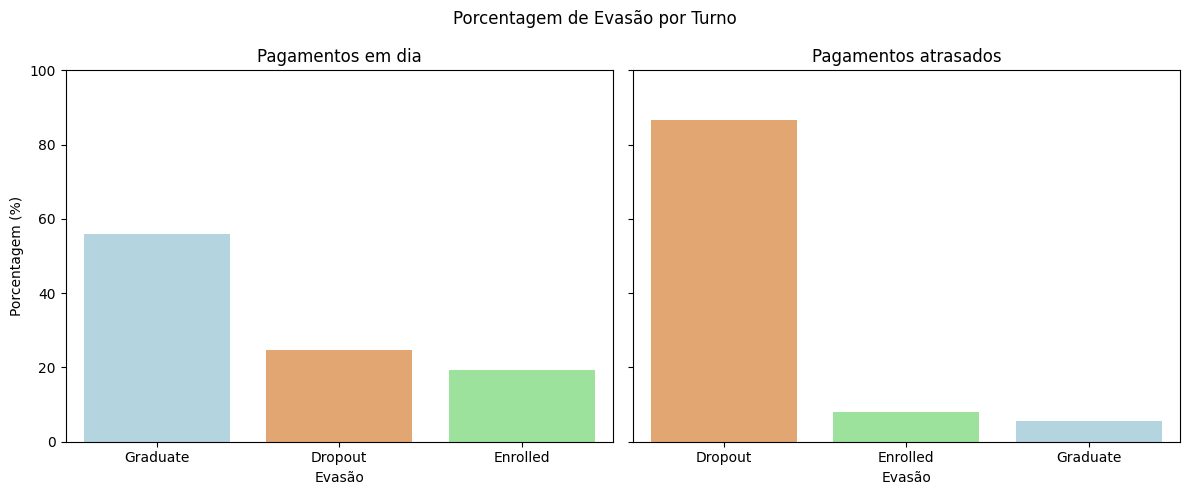

Pagamentos em dia Graduados: 55.95%
Pagamentos em dia Que evadiram: 24.74%
Pagamentos em dia Matriculados: 19.30%

Pagamentos atrasados Graduados: 5.49%
Pagamentos atrasados Que evadiram: 86.55%
Pagamentos atrasados Matriculados: 7.95%



In [10]:
grupos = {
    'Pagamentos em dia': dataQ[dataQ['Tuition fees up to date'] == 'yes'],
    'Pagamentos atrasados': dataQ[dataQ['Tuition fees up to date'] == 'no']
}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

pastel = {'Graduate': 'lightblue', 'Dropout': 'sandybrown', 'Enrolled': 'lightgreen'}

for ax, (titulo, grupo) in zip(axes, grupos.items()):
    proporcao = (grupo['Target'].value_counts(normalize=True) * 100).reset_index()
    proporcao.columns = ['Target', 'Porcentagem']
    
    sns.barplot(data=proporcao, x='Target', y='Porcentagem', hue='Target', ax=ax, palette=pastel)
    ax.set_title(titulo)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Evasão')
    ax.set_ylabel('Porcentagem (%)')


plt.suptitle('Porcentagem de Evasão por Turno')
plt.tight_layout()
plt.show()

for titulo, grupo in grupos.items():
    total = len(grupo)
    graduados = (grupo['Target'] == 'Graduate').sum()
    evadiram = (grupo['Target'] == 'Dropout').sum()
    matriculados = (grupo['Target'] == 'Enrolled').sum()
    
    graduados_pct = (graduados / total) * 100 if total > 0 else 0
    evadiram_pct = (evadiram / total) * 100 if total > 0 else 0
    matriculados_pct = (matriculados / total) * 100 if total > 0 else 0
    
    print(f"{titulo} Graduados: {graduados_pct:.2f}%")
    print(f"{titulo} Que evadiram: {evadiram_pct:.2f}%")
    print(f"{titulo} Matriculados: {matriculados_pct:.2f}%\n")



### Status internacional

Agora, vamos analisar a relação entre o estudante ser internacional ou não e a taxa de evasão (Em relação à porcentagem, para uma comparação proporcional)

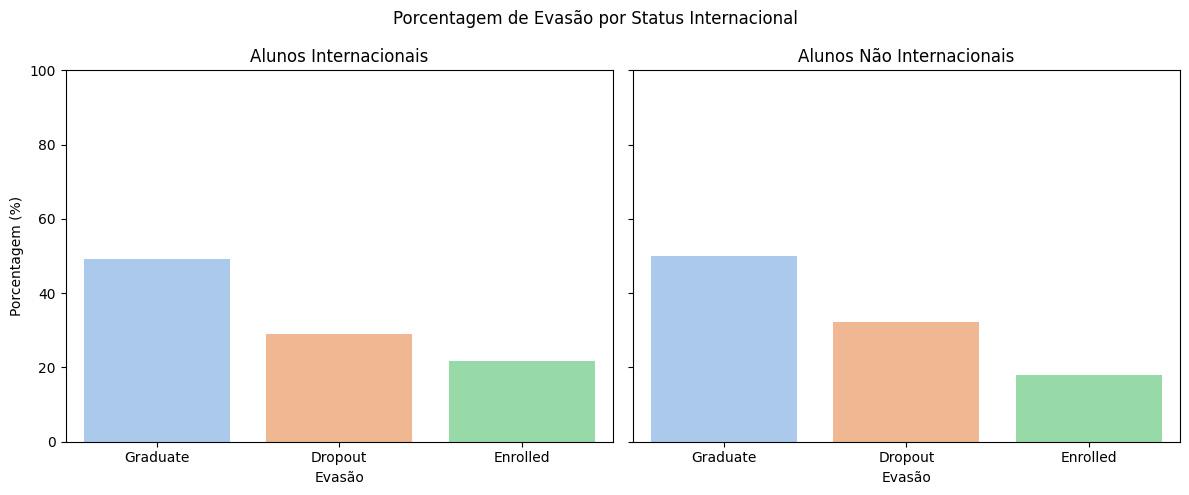

Alunos Internacionais Graduados: 49.09%
Alunos Internacionais Que evadiram: 29.09%

Alunos Não Internacionais Graduados: 49.95%
Alunos Não Internacionais Que evadiram: 32.20%



In [11]:
grupos = {
    'Alunos Internacionais': dataQ[dataQ['International'] == 'yes'],
    'Alunos Não Internacionais': dataQ[dataQ['International'] == 'no']
}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, (titulo, grupo) in zip(axes, grupos.items()):
    proporcao = (grupo['Target'].value_counts(normalize=True) * 100).reset_index()
    proporcao.columns = ['Target', 'Porcentagem']
    
    sns.barplot(data=proporcao, x='Target', y='Porcentagem', hue='Target', ax=ax, palette="pastel")
    ax.set_title(titulo)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Evasão')
    ax.set_ylabel('Porcentagem (%)' if titulo == 'Alunos Internacionais' else '')

plt.suptitle('Porcentagem de Evasão por Status Internacional')
plt.tight_layout()
plt.show()

for titulo, grupo in grupos.items():
    total = len(grupo)
    graduados = (grupo['Target'] == 'Graduate').sum()
    evadiram = (grupo['Target'] == 'Dropout').sum()
    
    graduados_pct = (graduados / total) * 100
    evadiram_pct = (evadiram / total) * 100
    
    print(f"{titulo} Graduados: {graduados_pct:.2f}%")
    print(f"{titulo} Que evadiram: {evadiram_pct:.2f}%\n")


In [58]:
dataQ["Mother\'s qualification"].value_counts()

Mother's qualification
Secondary Education - 12th Year of Schooling or Eq.         1069
Basic education 1st cycle (4th/5th year) or equiv.          1009
Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.     953
Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.       562
Higher Education - Degree                                    438
Unknown                                                      130
Higher Education - Bachelor's Degree                          83
Higher Education - Master's                                   49
Other - 11th Year of Schooling                                42
Higher Education - Doctorate                                  21
Higher education - degree (1st cycle)                          9
12th Year of Schooling - Not Completed                         8
Technological specialization course                            8
Specialized higher studies course                              6
Professional higher technical course                           4
Fr

### Formação dos pais vs. Evasão

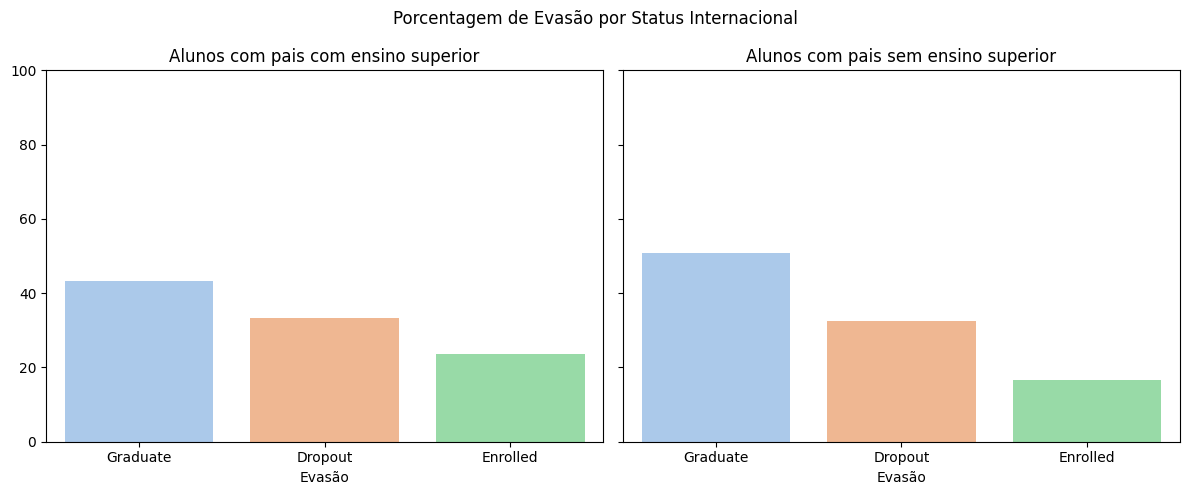

Alunos com pais com ensino superior Graduados: 43.15%
Alunos com pais com ensino superior Que evadiram: 33.20%

Alunos com pais sem ensino superior Graduados: 50.92%
Alunos com pais sem ensino superior Que evadiram: 32.40%



In [63]:
higher_education_levels = [
    'Higher Education - Degree',
    'Higher Education - Bachelor\'s Degree',
    'Higher Education - Master\'s',
    'Higher Education - Doctorate',
    'Higher education - degree (1st cycle)',
    'Higher Education - Master (2nd cycle)',
    'Higher Education - Doctorate (3rd cycle)'
]

grupos = {
    'Alunos com pais com ensino superior': dataQ[
        (dataQ["Mother's qualification"].isin(higher_education_levels)) & 
        (dataQ["Father's qualification"].isin(higher_education_levels))
    ],
    
    'Alunos com pais sem ensino superior': dataQ[
        ~(
            dataQ["Mother's qualification"].isin(higher_education_levels) | 
            dataQ["Father's qualification"].isin(higher_education_levels)
        )
    ]
}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, (titulo, grupo) in zip(axes, grupos.items()):
    proporcao = (grupo['Target'].value_counts(normalize=True) * 100).reset_index()
    proporcao.columns = ['Target', 'Porcentagem']
    
    sns.barplot(data=proporcao, x='Target', y='Porcentagem', hue='Target', ax=ax, palette="pastel")
    ax.set_title(titulo)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Evasão')
    ax.set_ylabel('Porcentagem (%)' if titulo == 'Alunos Internacionais' else '')

plt.suptitle('Porcentagem de Evasão por Status Internacional')
plt.tight_layout()
plt.show()

for titulo, grupo in grupos.items():
    total = len(grupo)
    graduados = (grupo['Target'] == 'Graduate').sum()
    evadiram = (grupo['Target'] == 'Dropout').sum()
    
    graduados_pct = (graduados / total) * 100
    evadiram_pct = (evadiram / total) * 100
    
    print(f"{titulo} Graduados: {graduados_pct:.2f}%")
    print(f"{titulo} Que evadiram: {evadiram_pct:.2f}%\n")


## Análise de variáveis quantitativas

### Nota de Admissão

Podemos ver que alunos com menor nota de admissão possuem maior taxa de evasão:

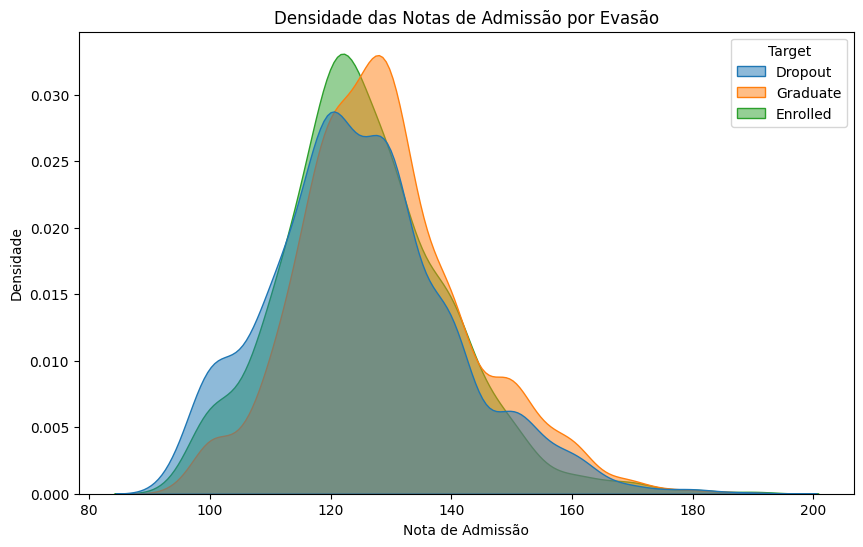

In [29]:
plt.figure(figsize=(10,6))

pastel = {'Graduate': 'lightblue', 'Dropout': 'sandybrown', 'Enrolled': 'lightgreen'}

sns.kdeplot(data=dataQ, x='Admission grade', hue='Target', fill=True, common_norm=False, alpha=0.5)

plt.xlabel('Nota de Admissão')
plt.ylabel('Densidade')
plt.title('Densidade das Notas de Admissão por Evasão')

plt.show()


### Idade quando matriculado

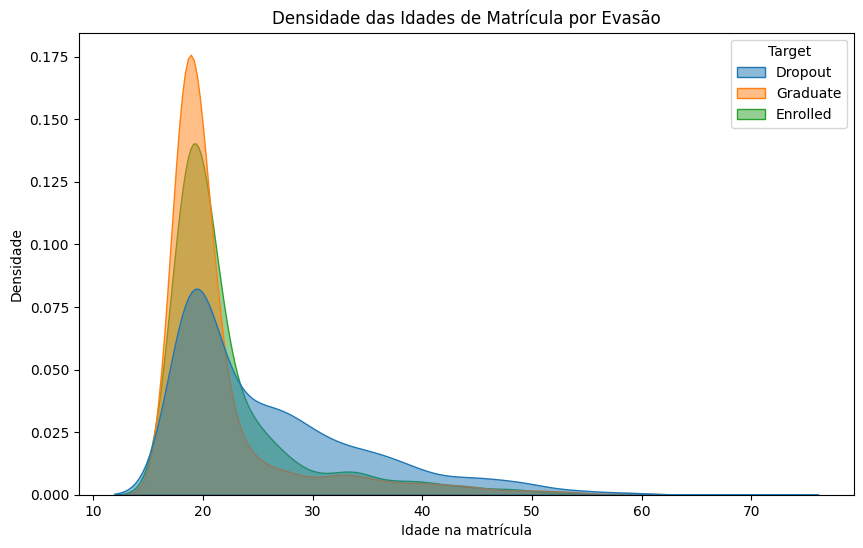

In [28]:
plt.figure(figsize=(10,6))

sns.kdeplot(data=dataQ, x='Age at enrollment', hue='Target', fill=True, common_norm=False, alpha=0.5)

plt.xlabel('Idade na matrícula')
plt.ylabel('Densidade')
plt.title('Densidade das Idades de Matrícula por Evasão')

plt.show()

Diminuindo os extremos do gráfico para visualizar melhor a relação da idade e das notas:

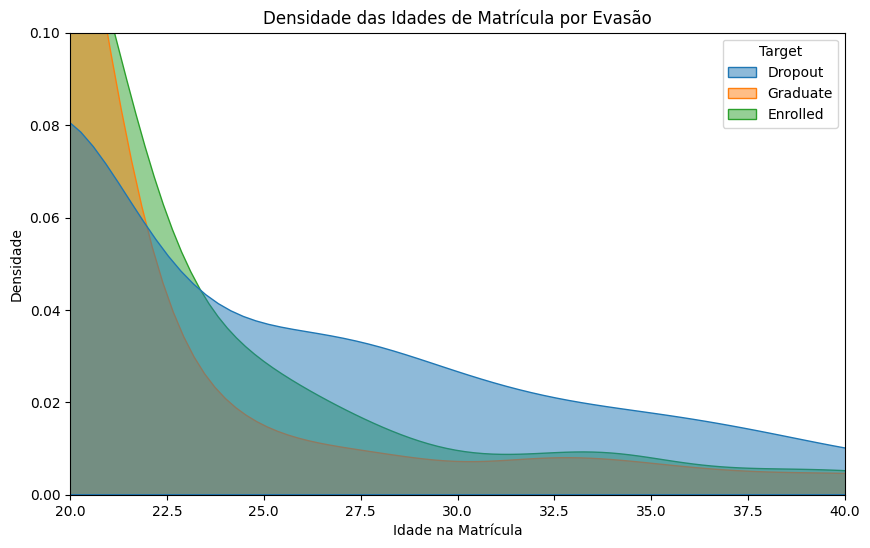

In [26]:
plt.figure(figsize=(10,6))

sns.kdeplot(
    data=dataQ, 
    x='Age at enrollment', 
    hue='Target', 
    fill=True, 
    common_norm=False, 
    alpha=0.5
)

plt.xlabel('Idade na Matrícula')  # Aqui o eixo é 'Age at enrollment'
plt.ylabel('Densidade')
plt.title('Densidade das Idades de Matrícula por Evasão')

# Zoom → ajusta limites do eixo X e/ou Y
plt.xlim(20, 40)   # por exemplo, só entre 15 e 30 anos
plt.ylim(0, 0.1)   # opcional: se quiser limitar o eixo Y também

plt.show()


Assim, podemos ver que a taxa de evasão passa a ser maior que a taxa de quando analisamos alunos que se matricularam com mais de 25 anos.

### Distribuição geral das notas

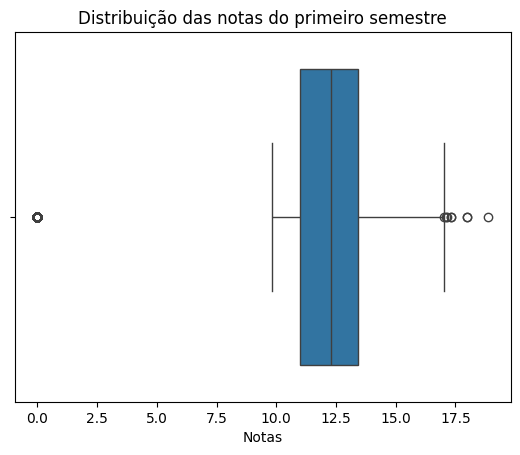

Média geral 1° Semestre:
10.64


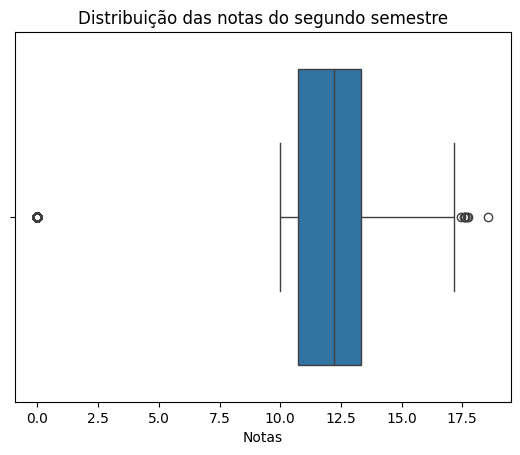

Média geral 2° Semestre:
10.23


In [56]:
#Notas do primeiro semestre
sns.boxplot(data=dataQ, x='Curricular units 1st sem (grade)')
plt.title("Distribuição das notas do primeiro semestre")
plt.xlabel("Notas")
plt.show()

print("Média geral 1° Semestre:")
print(dataQ['Curricular units 1st sem (grade)'].mean().round(2))

#Notas do segundo semestre
sns.boxplot(data=dataQ, x='Curricular units 2nd sem (grade)')
plt.title("Distribuição das notas do segundo semestre")
plt.xlabel("Notas")
plt.show()

print("Média geral 2° Semestre:")
print(dataQ['Curricular units 2nd sem (grade)'].mean().round(2))

### Status do aluno vs. Notas no primeiro semestre

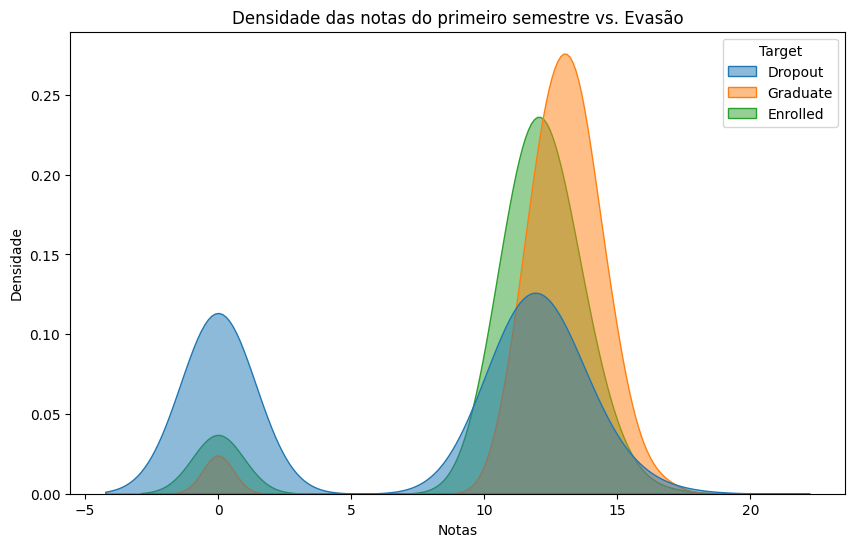

In [30]:
plt.figure(figsize=(10,6))

sns.kdeplot(data=dataQ, x='Curricular units 1st sem (grade)', hue='Target', fill=True, common_norm=False, alpha=0.5)

plt.xlabel('Notas')
plt.ylabel('Densidade')
plt.title('Densidade das notas do primeiro semestre vs. Evasão')

plt.show()

## Status do aluno vs. notas do segundo semestre

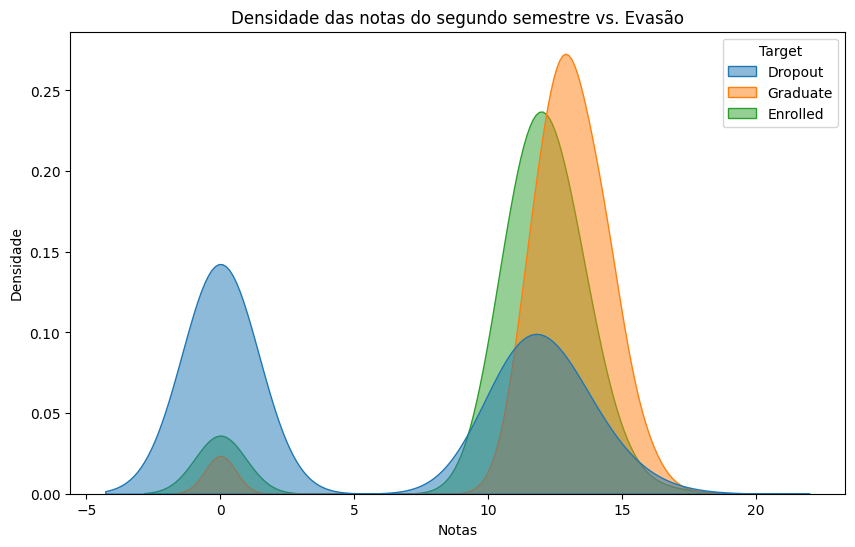

In [35]:
plt.figure(figsize=(10,6))

sns.kdeplot(data=dataQ, x='Curricular units 2nd sem (grade)', hue='Target', fill=True, common_norm=False, alpha=0.5)

plt.xlabel('Notas')
plt.ylabel('Densidade')
plt.title('Densidade das notas do segundo semestre vs. Evasão')

plt.show()

In [57]:
dataQ

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general contingent,6,Journalism and Communication,daytime,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1st phase - general contingent,2,Journalism and Communication,daytime,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1st phase - general contingent,1,Nursing,daytime,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general contingent,1,Management,daytime,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
